<body>
    <div>
        <h2 style='font-family: cursive; font-size: 40px;'>Teorema de la falsa posición</h2>
        <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/False_position_method.svg/702px-False_position_method.svg.png alt=middle style="height: 340px">
    </div>
</body>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Formulación matemática</h3>

<p style="font-size: 19px">
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$f(a)*f(b) < 0$<br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$x_n+1$ = $x_n$ - $\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} * f(x_n)$ 
</p>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Valores iniciales</h3>

<div style='text-align: center;'>
$x_0$: Parte izquierda del intervalo.<br>
$x_1$: Parte derecha del intervalo.
</div>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Ventajas y desventajas</h3>

<table style="width:100%; text-align: left; font-size: 14px">
    <tr style="text-align: left;">
        <th style="text-align: left;">Ventajas</th>
        <th style="text-align: left;">Desventajas</th>
    </tr>
    <tr>
        <td style="text-align: left;">No diverge.</td>
        <td style="text-align: left;">Converge lentamente a la solución, debido al efectuar las iteraciones uno de los extremos del intervalo no se modifica, como se muestra en la figura.</td>
    </tr>
</table>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Pseudocódigo</h3>

<ol>
    <li>Verificar condicion de Bolzano</li>
    <li>$x_{k+1}$ $= x_1 -$ $\frac{(x_1 - x_0)} {(f(x_1) - f(x_0))}$ $* f(x_1)$</li>
    <li>Mientras error %lt tolerancia</li>
    <li>Si cumple condicion de bolzano</li>
    <li>b=$x_{k+1}$</li>
    <li>c=a</li>
    <li>$x_{k+1}$ $= x_k -$ $\frac{(x_k - c)} {(f(x_k) - f(c))}$ $* f(x_k)$</li>
    <li>Sino</li>
    <li>a=$x_{k+1}$</li>
    <li>c=b</li>
    <li>$x_{k+1}$ $= x_k -$ $\frac{(x_k - c)} {(f(x_k) - f(c))}$ $* f(x_k)$</li>
    <li>Fin Si</li>
    <li>$error = |f(x_k)|$</li>
    <li>Fin Mientras</li>
</ol>

<h3 style="font-family: 'Courier New'; font-size:25px">Octave</h3>

In [7]:
format long

function [xk,e]=false_pos_aux(footion, ck, xk, tol, i, iter, error, e)
    %Esta función auxiliar del metodo de la falsa posicion, que realiza las iteraciones que se le haya 
    %indicado.
    %
    %Sintaxis:  false_pos_aux(footion, ck, xk, tol, i, iter, error, e)
    % 
    %Parámetros Iniciales: 
    %            footion = Funcion que se esta resolviendo.
    %            ck = punto del intervalo que se esoje segun la condicion de bolzano.
    %            xk = punto del intervalo que se esoje segun la condicion de bolzano.
    %            i = iteracion actual.
    %            error = error de la iteracion anterior
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    %            iter = cantidad de iteraciones máximas.
    %            e = La lista de errores de la aproximacion.
    %
    %Parámetros de Salida:                           
    %            xk = aproximación del cero de la función f
    %            error =  |f(x)|
    if footion(xk) * footion(ck) < 0
        if i >= iter || error <= tol
            xk=xk;
            e=e;
        else 
            x2 = xk - ((xk - ck) / (footion(xk) - footion(ck))) * footion(xk);
            error=abs(x2-xk);
            e = [e error];
            [xk,e] = false_pos_aux(footion, ck, x2, tol, i+1, iter, error, e);
            if xk == 0
                [xk,e] = false_pos_aux(footion, xk, x2, tol, i+1, iter, error, e);
            end         
        end
    else
        xk = 0;
        e = [];
    end
end


function [xk,e]=false_pos(f, x0, x1, tol, iter)
    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la falsa posición.
    %
    %Sintaxis:  false_pos(f, x0, x1, tol, iter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f.
    %            x0 = punto izquierdo del intervalo donde se comienza la iteración.
    %            x1 = punto derecho del intervalo donde se comienza la iteración.
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    %            iter = cantidad de iteraciones máximas.
    %            
    %Parámetros de Salida:                           
    %            xk = aproximación del cero de la función f
    %            error =  |f(x)|
    
    footion = str2func(strcat('@(x)',f));
    if footion(x0) * footion(x1) < 0 && tol > 10^-16
        x2 = x1 - ((x1 - x0) / (footion(x1) - footion(x0))) * footion(x1);
        error = abs(footion(x2));
        [a,e1] = false_pos_aux(footion, x0, x2, tol, 0, iter, error, [error]);
        [b,e2] = false_pos_aux(footion, x1, x2, tol, 0, iter, error, [error]);
        if a ~= 0
            xk = a;
            e = e1;
        else
            xk = b;
            e = e2;
        end
    else
        xk=0;
        e=[];
        display("error");
    end
    plot(0:length(e)-1,e);
end



<h3 style="font-family: 'Courier New'; font-size:25px">Python</h3>

In [4]:
def len_list(it):
    list = []
    for i in range(it):
        list.append(i)
    return list


def plot(e):
    import matplotlib.pyplot
    matplotlib.pyplot.plot(len_list(len(e)), e)
    

def calc_x(footion, xk, c):
    """
    Esta funcion calcula el siguiente valor de xk usando la formula de la secante.
    Parametros iniciales:
    footion = Funcion que se esta resolviendo.
    xk = Parte del intervalo.
    c = Parte del intervalo.
    
    Parámetros de Salida: 
    x2 = aproximación del cero de la función f.
    """
    fx0 = float(footion.subs({'x': c}))
    fx1 = float(footion.subs({'x': xk}))
    x2 = float(xk - ((xk - c) / (fx1 - fx0)) * fx1)
    return x2


def false_pos(f, x0, x1, tol, iter):
    """
    Esta función aproxima la solución de una ecuació f(x)=0, implementando el metodo de la falsa posicion.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f.
    x0 = punto izquierdo del intervalo donde se comienza la iteración.
    x1 = punto derecho del intervalo donde se comienza la iteración.
    tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    iter = cantidad de iteraciones máximas.
    
    Parámetros de Salida: 
    [x2,error], donde                
    x2 = aproximación del cero de la función f.
    error =  |f(x_k)|
    """
    from sympy import sympify
    footion = sympify(f)
    x2=0

    fx=float(footion.subs({'x': x0}) * footion.subs({'x': x1}))
    if fx<0:
        x2=float(x1-(x1-x0)/(footion.subs({'x': x1})-footion.subs({'x': x0})) * footion.subs({'x': x1}))
    else:
        return 0
    error = tol + 1;
    a = x0
    b = x1
    c = x0
    e = []
    i = 0
    while error > tol and iter >= i:
        fx0=float(footion.subs({'x': c}))
        fx1=float(footion.subs({'x': x2}))
        if fx0*fx1<0:
            b=x2
            c=a
            x2=calc_x(footion, b, c)
            error=abs(x2-b)
        else:
            a=x2
            c=b
            x2=calc_x(footion, a, c)
            error=abs(x2-a)
        e.append(error)
        i+=1
        
    return x2, e


<h3 style="font-family: 'Courier New'; font-size:25px">Ejemplo Numérico</h3>

<h5 style="font-family: 'Courier New'; font-size:16px">Python</h5>

In [6]:
x2, e = false_pos('1-(20^2/(9.81*(3*x+x^2/2)))*(3+x)', 0.5, 2.5, 10**-12, 10)
print(x2)
#plot(e)

TypeError: cannot unpack non-iterable int object

<h5 style="font-family: 'Courier New'; font-size:16px">Octave</h5>

error
xk = 0
e = [](0x0)


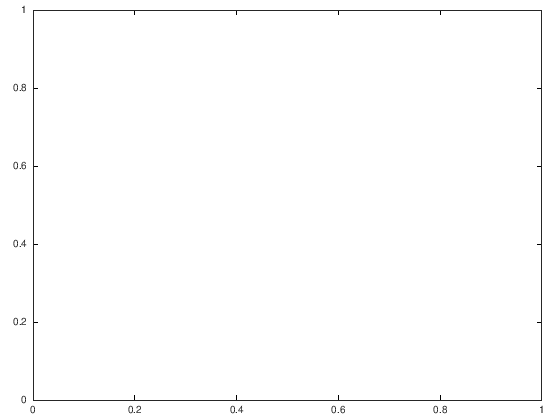

In [8]:
[xk,e]=false_pos('1-(20^2/(9.81*(3*x+x^2/2)))*(3+x)', 0.5, 2.5, 10^-12, 10)